# Analyse Track Data

Plot distributions of metrics from track data exported by TrackMate

We begin by importing the necessary packages:

In [26]:
import glob
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Specify the location of the exported TrackMate data and read it using pandas, to provide DataFrames:

In [27]:
METRIC_OF_INTEREST = 'TRACK_MEAN_SPEED'

file_paths = glob.glob(
    'Z:/working/Training/2024-Crick Microscopy Course/Live imaging/trial data/Prelim_analysis_2/Pos*/*_Pos*_tracks.csv')

position_labels = []
datasets = []

# Regex to extract position number from file name
position_pattern = re.compile(r'_Pos(\d+)_')

for file_path in file_paths:
    # Extract position number from file name
    match = position_pattern.search(file_path)
    position_num = -1
    if match:
        position_num = int(match.group(1))
        position_labels.append(position_num)

    data = pd.read_csv(file_path, skiprows=[1, 2, 3])
    datasets.append(data[METRIC_OF_INTEREST].values)

Use matplotlib to generate a histogram:

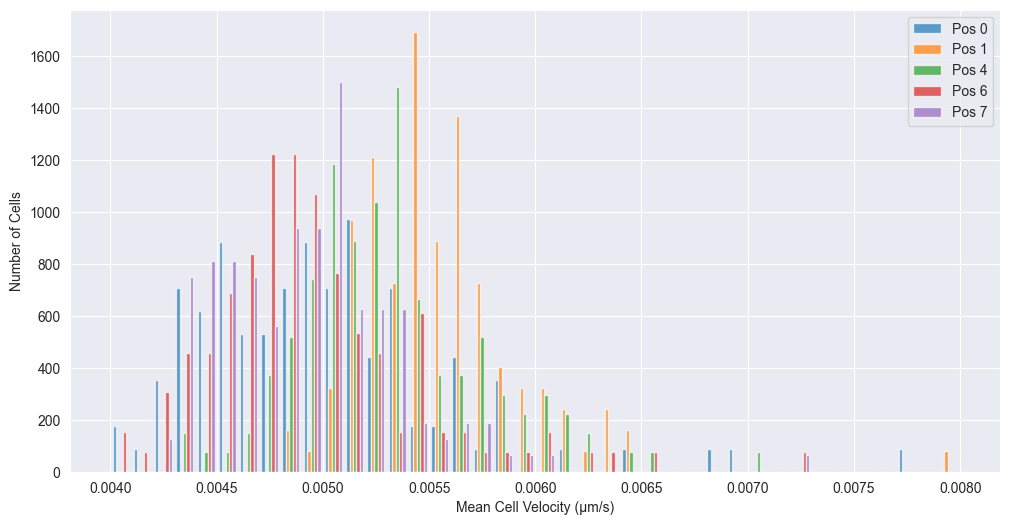

In [28]:
%matplotlib inline
plt.figure(figsize=(12, 6))

plt.hist(datasets, bins=40, range=(0.004, 0.008), alpha=0.7, density=True,
         label=[f'Pos {pos}' for pos in position_labels])
plt.xlabel("Mean Cell Velocity (\u03BCm/s)")
plt.ylabel("Number of Cells")
plt.legend()
plt.show()

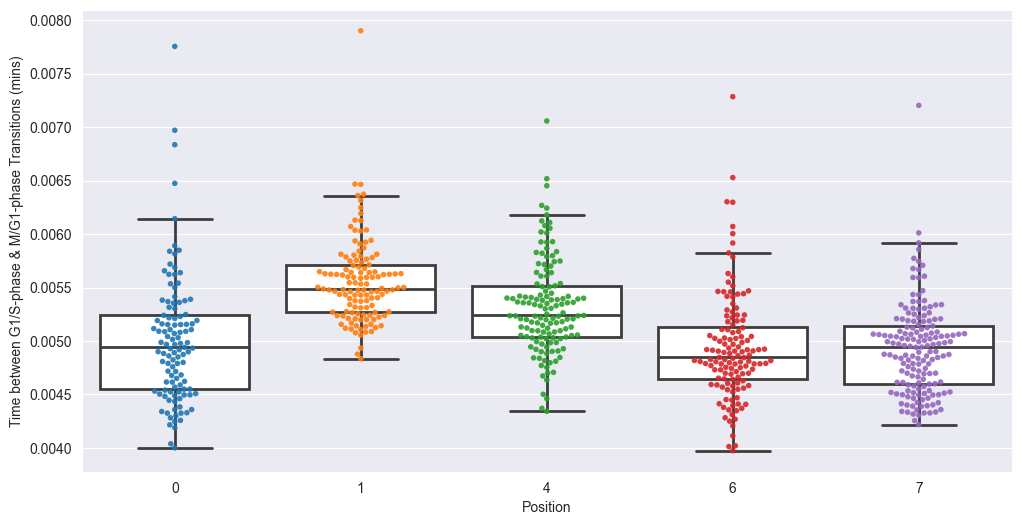

In [29]:
# Boxplot and Swarmplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=datasets, color='white', showfliers=False, ax=ax, linewidth=2)
sns.swarmplot(data=datasets, size=4, alpha=0.9, ax=ax)

# Set the ticks and labels
ax.set_xticks(range(len(position_labels)))  # Ensure the number of ticks matches the number of labels
ax.set_xticklabels(position_labels)

ax.set_ylabel('Time between G1/S-phase & M/G1-phase Transitions (mins)')
ax.set_xlabel('Position')
plt.show()